In [1]:
import numpy as np 
import pandas as pd
from statsmodels.stats.multitest import multipletests
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from lifelines import KaplanMeierFitter

from lifelines.statistics import multivariate_logrank_test
import mmrf_data_loader 

In [2]:
# Load clinical MMRF data
patient_list, patients_mask, event_duration, censorlist = mmrf_data_loader.load_MMRF_clinical_data()

659
10
659


In [3]:
data_all = scipy.io.loadmat('data/data_may4_2022.mat')
rna_data = data_all['rna_data']
rna_data = rna_data[:, patients_mask]
for n in range(0, rna_data.shape[0]): 
    for m in range(0, rna_data.shape[1]): 
        rna_data[n, m] = rna_data[n, m][0][0]
wee1_data = rna_data[8152, :]

In [4]:
gene_list = data_all['gene_list']
gene_list = [x.strip(' ') for x in gene_list]
gene_list = np.array(gene_list) 

In [5]:
clinical_data = pd.read_csv('data/commpass_clinical.csv')
sctflag = clinical_data['sctflag'].values

In [6]:
WEE1_low_mask = wee1_data < np.percentile(wee1_data, 33)
WEE1_high_mask = wee1_data > np.percentile(wee1_data, 66)
WEE1_mask = WEE1_low_mask + WEE1_high_mask
wee1_labels = 1*WEE1_low_mask + 2*WEE1_high_mask

In [7]:
event_duration = event_duration[WEE1_mask]
censorlist = censorlist[WEE1_mask]
wee1_labels = wee1_labels[WEE1_mask]

In [8]:
sctflag = sctflag[WEE1_mask]

230
1 5.016438356164383  years
2 2.9178082191780823  years


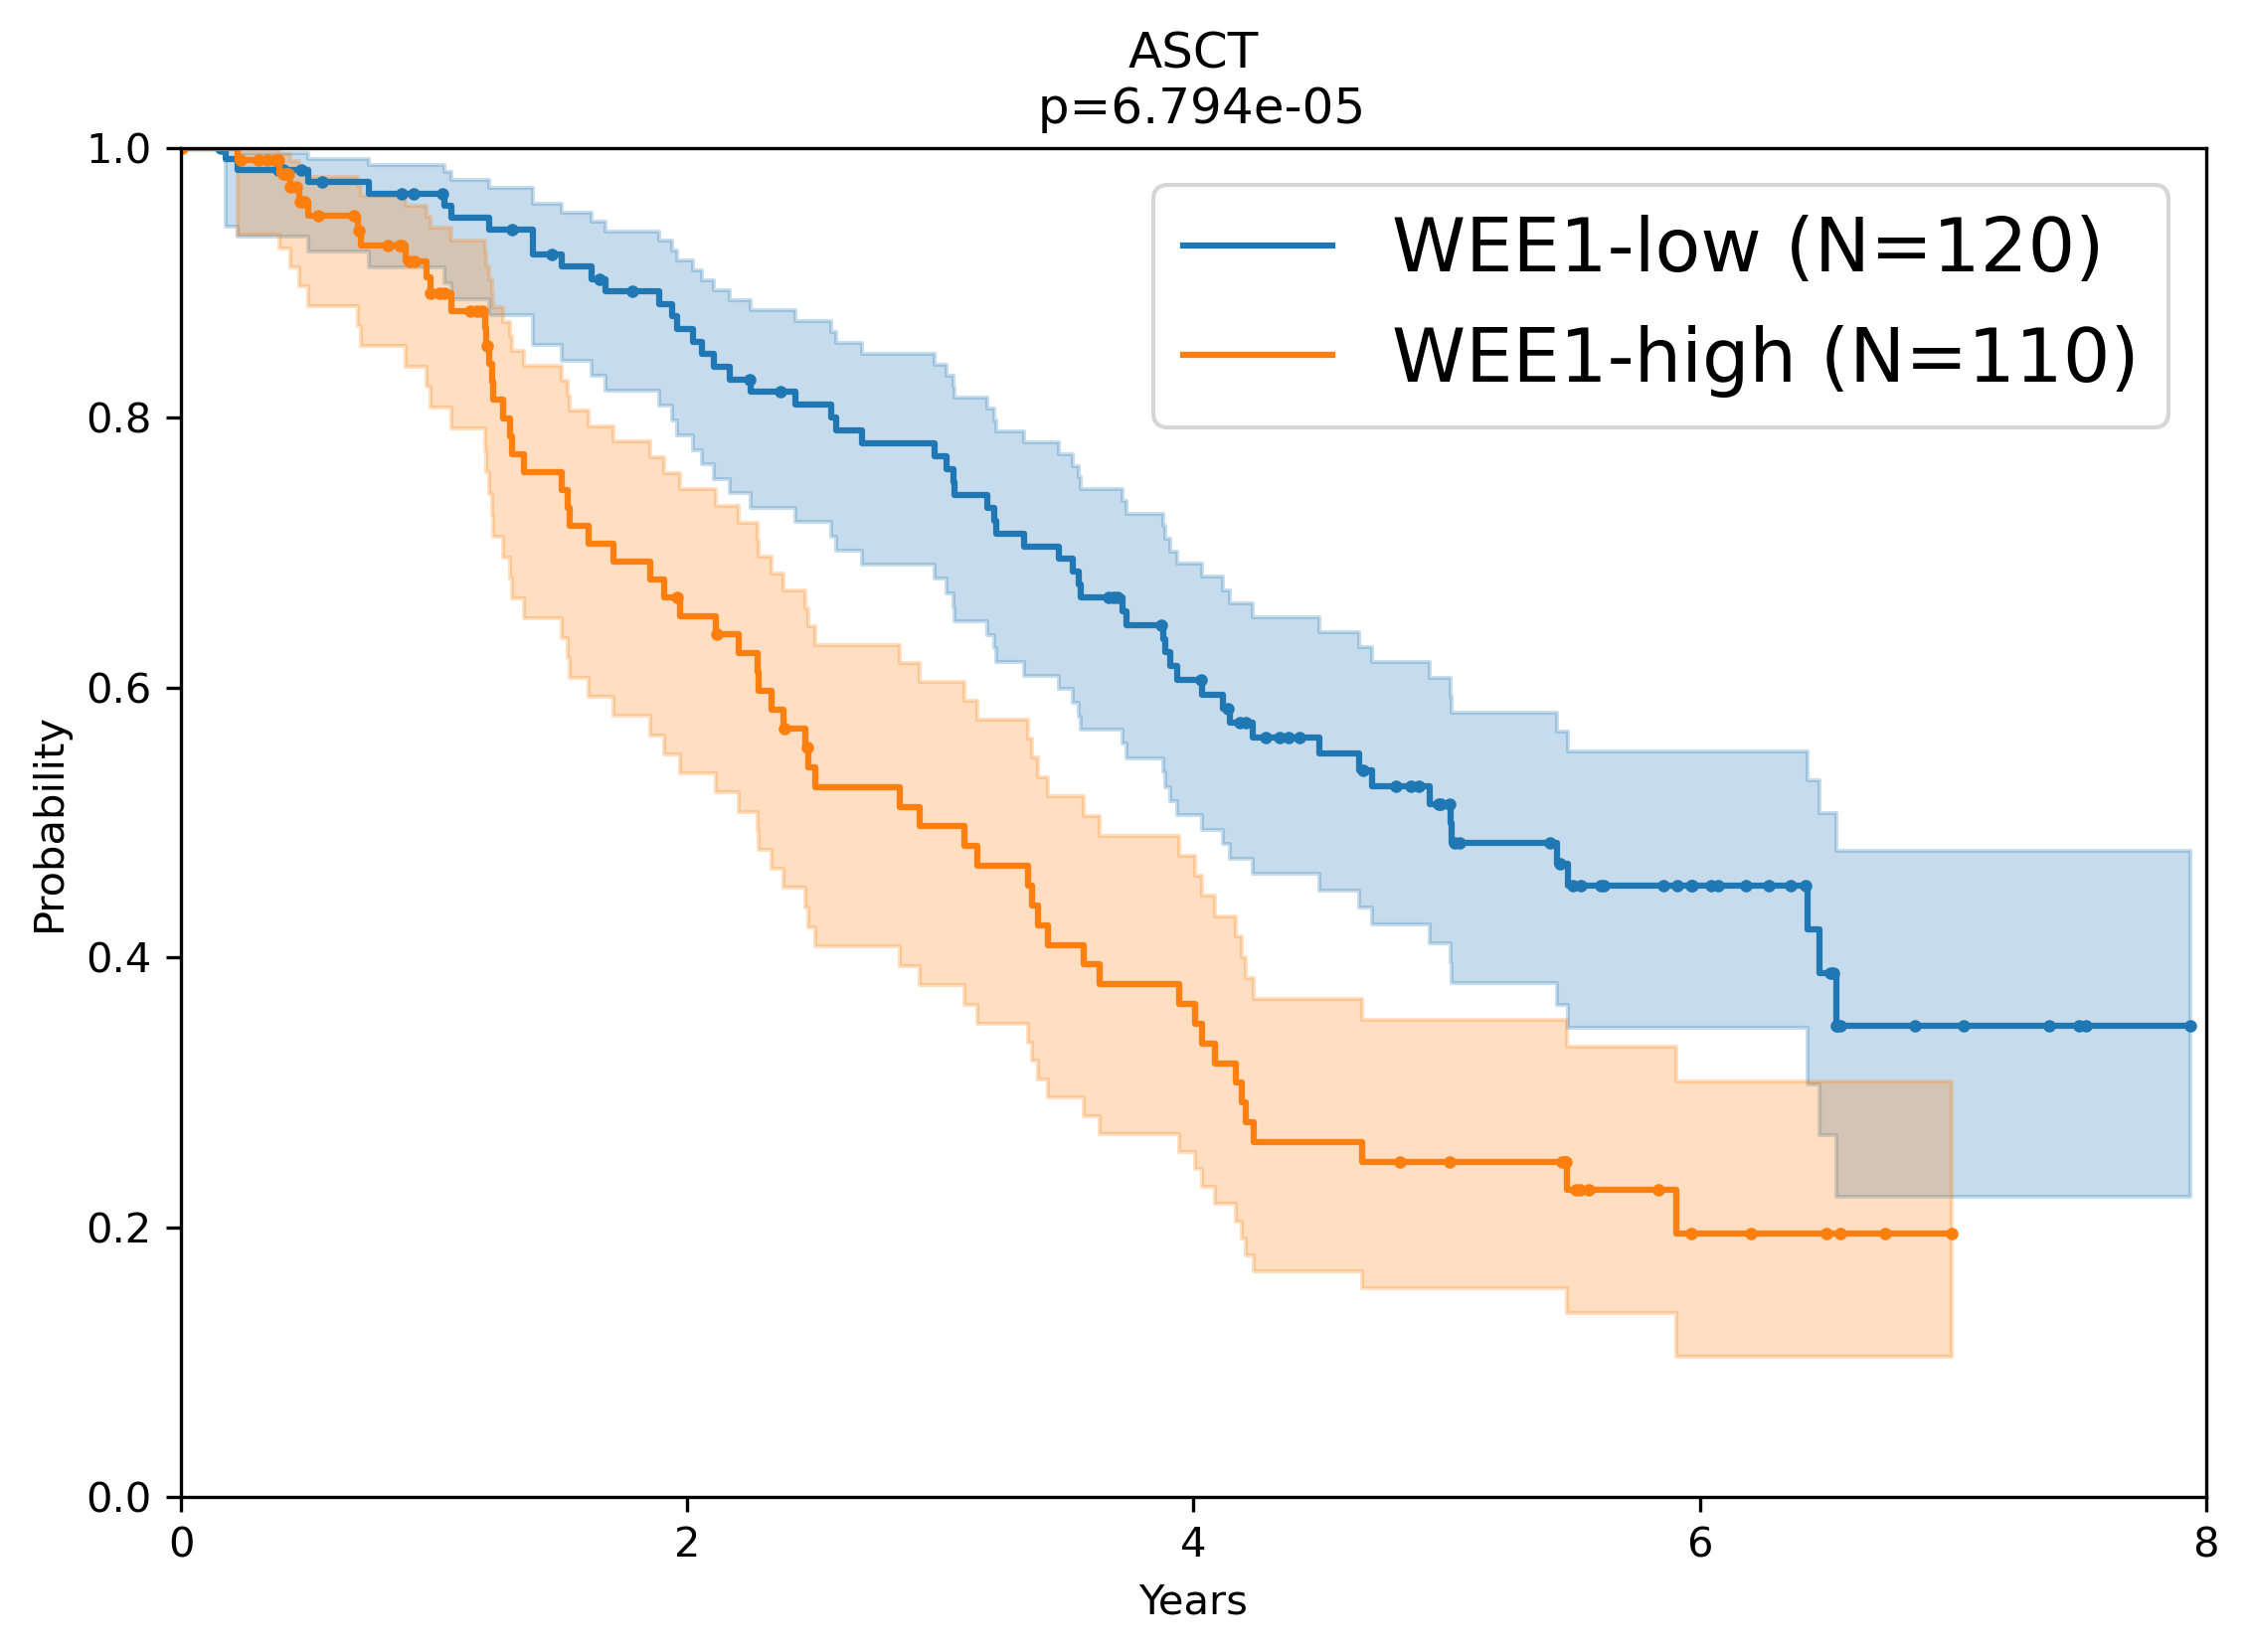

In [9]:
sct_mask = sctflag == 1

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['low', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1-"+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("ASCT\n p=" + "{:.3e}".format(output.p_value))
# plt.title("SCT-True, KM PFS curves, p=" + str(output.p_value))
plt.xlabel('Years')
plt.ylabel('Probability')

plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()

# plt.savefig('ASCT.png')


sct_true_pval = output.p_value

212
1 2.9972602739726026  years
2 1.2602739726027397  years


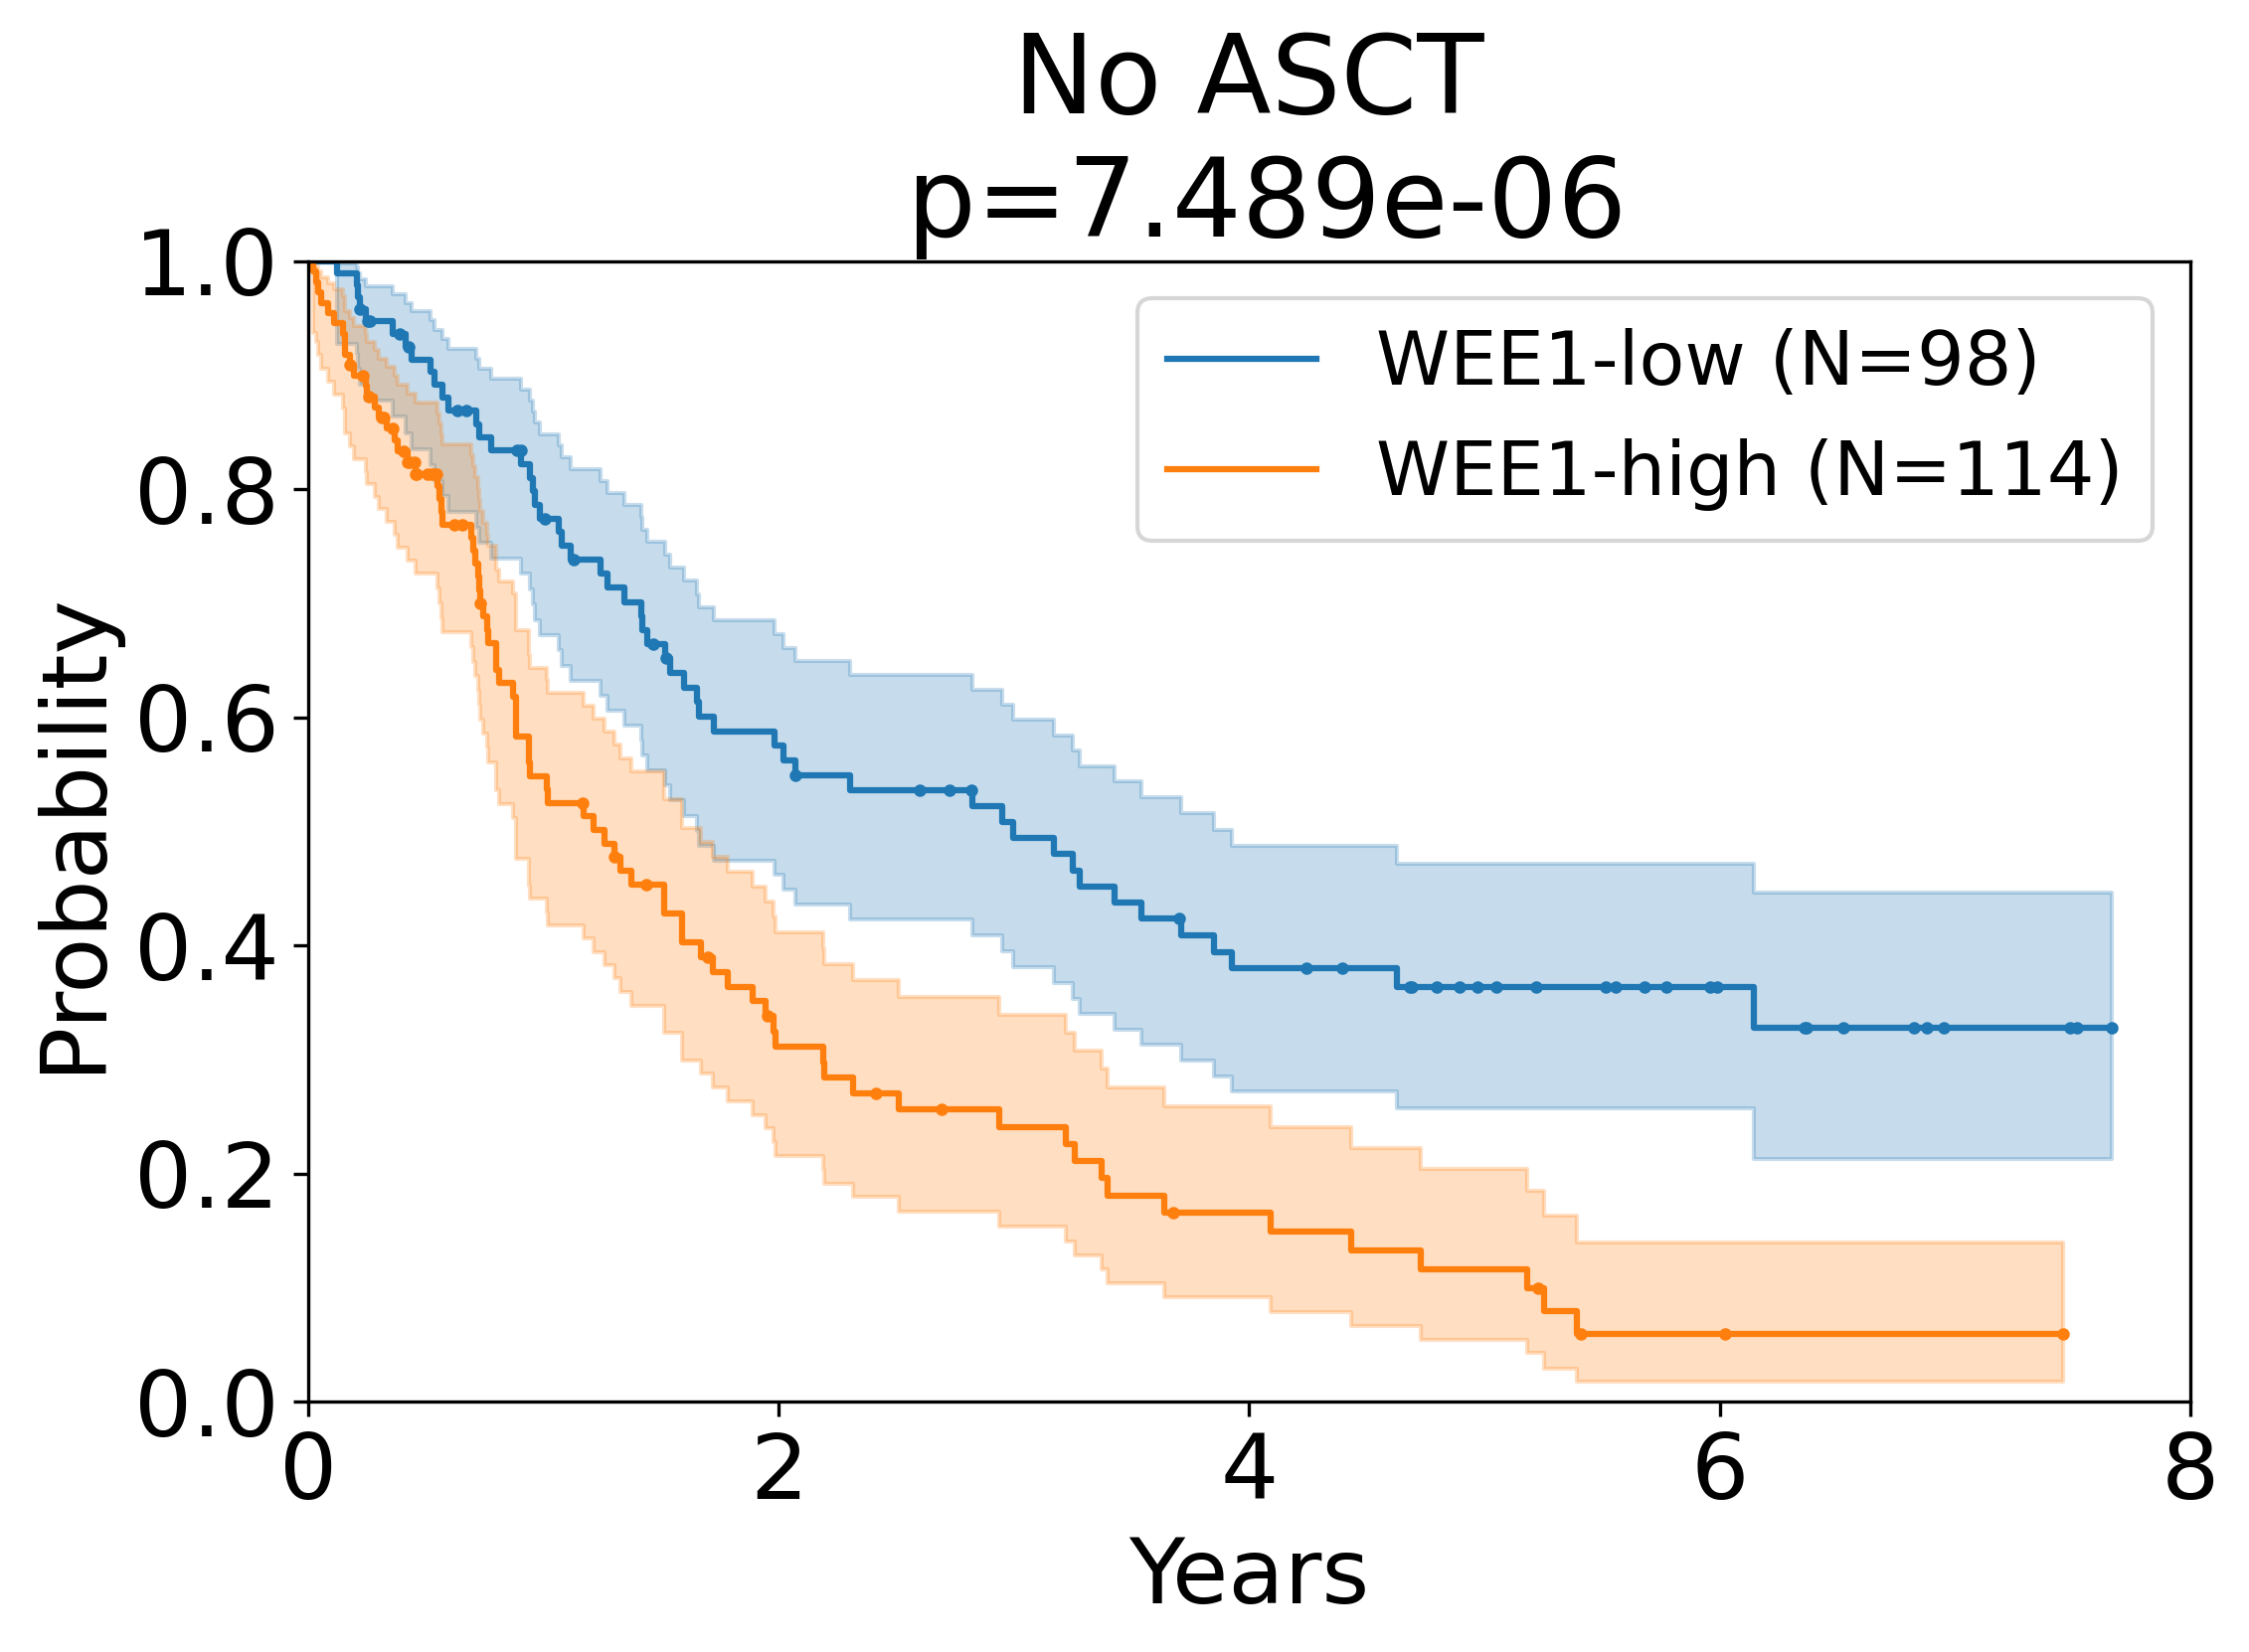

In [10]:
sct_mask = sctflag == 0

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['empty', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1-"+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("No ASCT\n p=" + "{:.3e}".format(output.p_value))
# plt.title("SCT-True, KM PFS curves, p=" + str(output.p_value))
plt.xlabel('Years')
plt.ylabel('Probability')
plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()

# plt.savefig('No_ASCT.png')

sct_true_pval = output.p_value

In [12]:
clinical_data['D_PT_therclass'].value_counts()

combined bortezomib/IMIDs-based                317
Bortezomib-based                               138
combined IMIDs/carfilzomib-based               110
Carfilzomib-based                               38
IMIDs-based                                     32
combined bortezomib/IMIDs/carfilzomib-based     23
combined bortezomib/carfilzomib-based            1
Name: D_PT_therclass, dtype: int64

In [13]:
therapylist = clinical_data['D_PT_therclass'].values

In [14]:
np.mean(wee1_data[therapylist=='combined bortezomib/IMIDs-based']) 

2.3820501772799494

In [15]:
wee1_clin_data = clinical_data.loc[WEE1_mask, :]

In [16]:
wee1_clin_data = wee1_clin_data.reset_index()

In [17]:
wee1_clin_data['D_PT_therclass'].value_counts()

combined bortezomib/IMIDs-based                213
Bortezomib-based                                83
combined IMIDs/carfilzomib-based                71
Carfilzomib-based                               31
IMIDs-based                                     25
combined bortezomib/IMIDs/carfilzomib-based     18
combined bortezomib/carfilzomib-based            1
Name: D_PT_therclass, dtype: int64

213
1 4.117808219178082  years
2 2.1123287671232878  years
229
1 3.852054794520548  years
2 1.9452054794520548  years


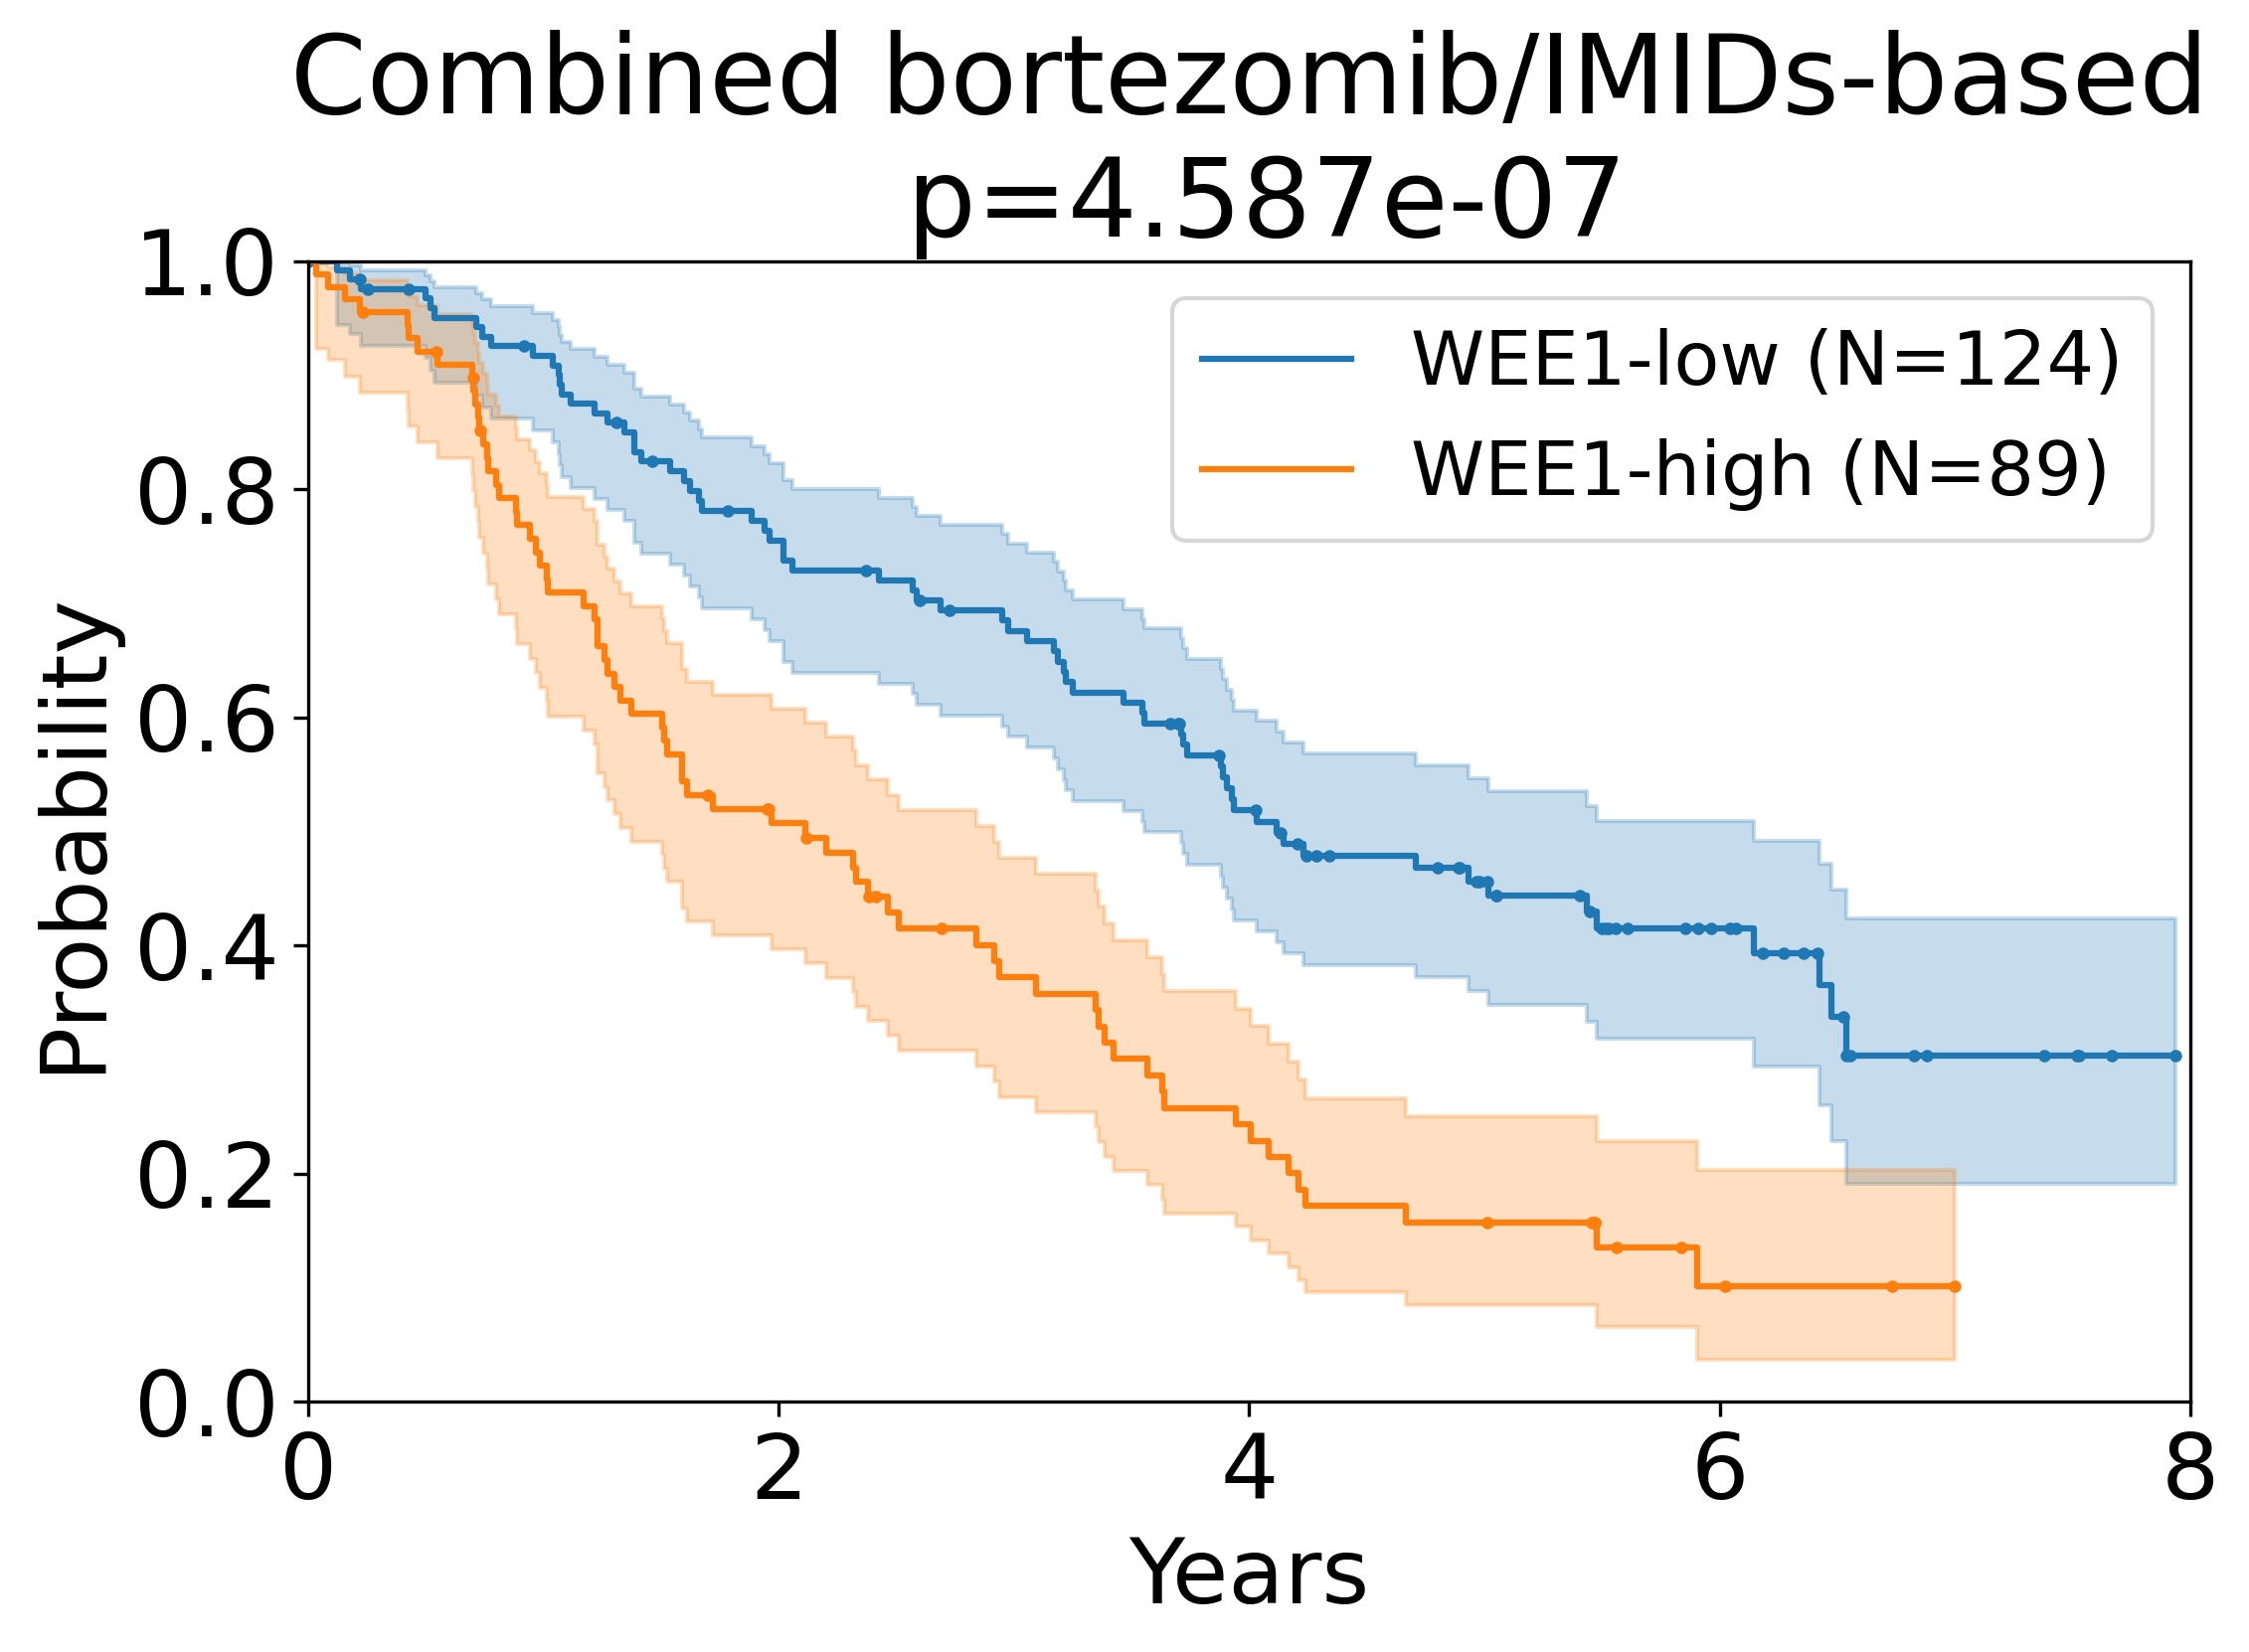

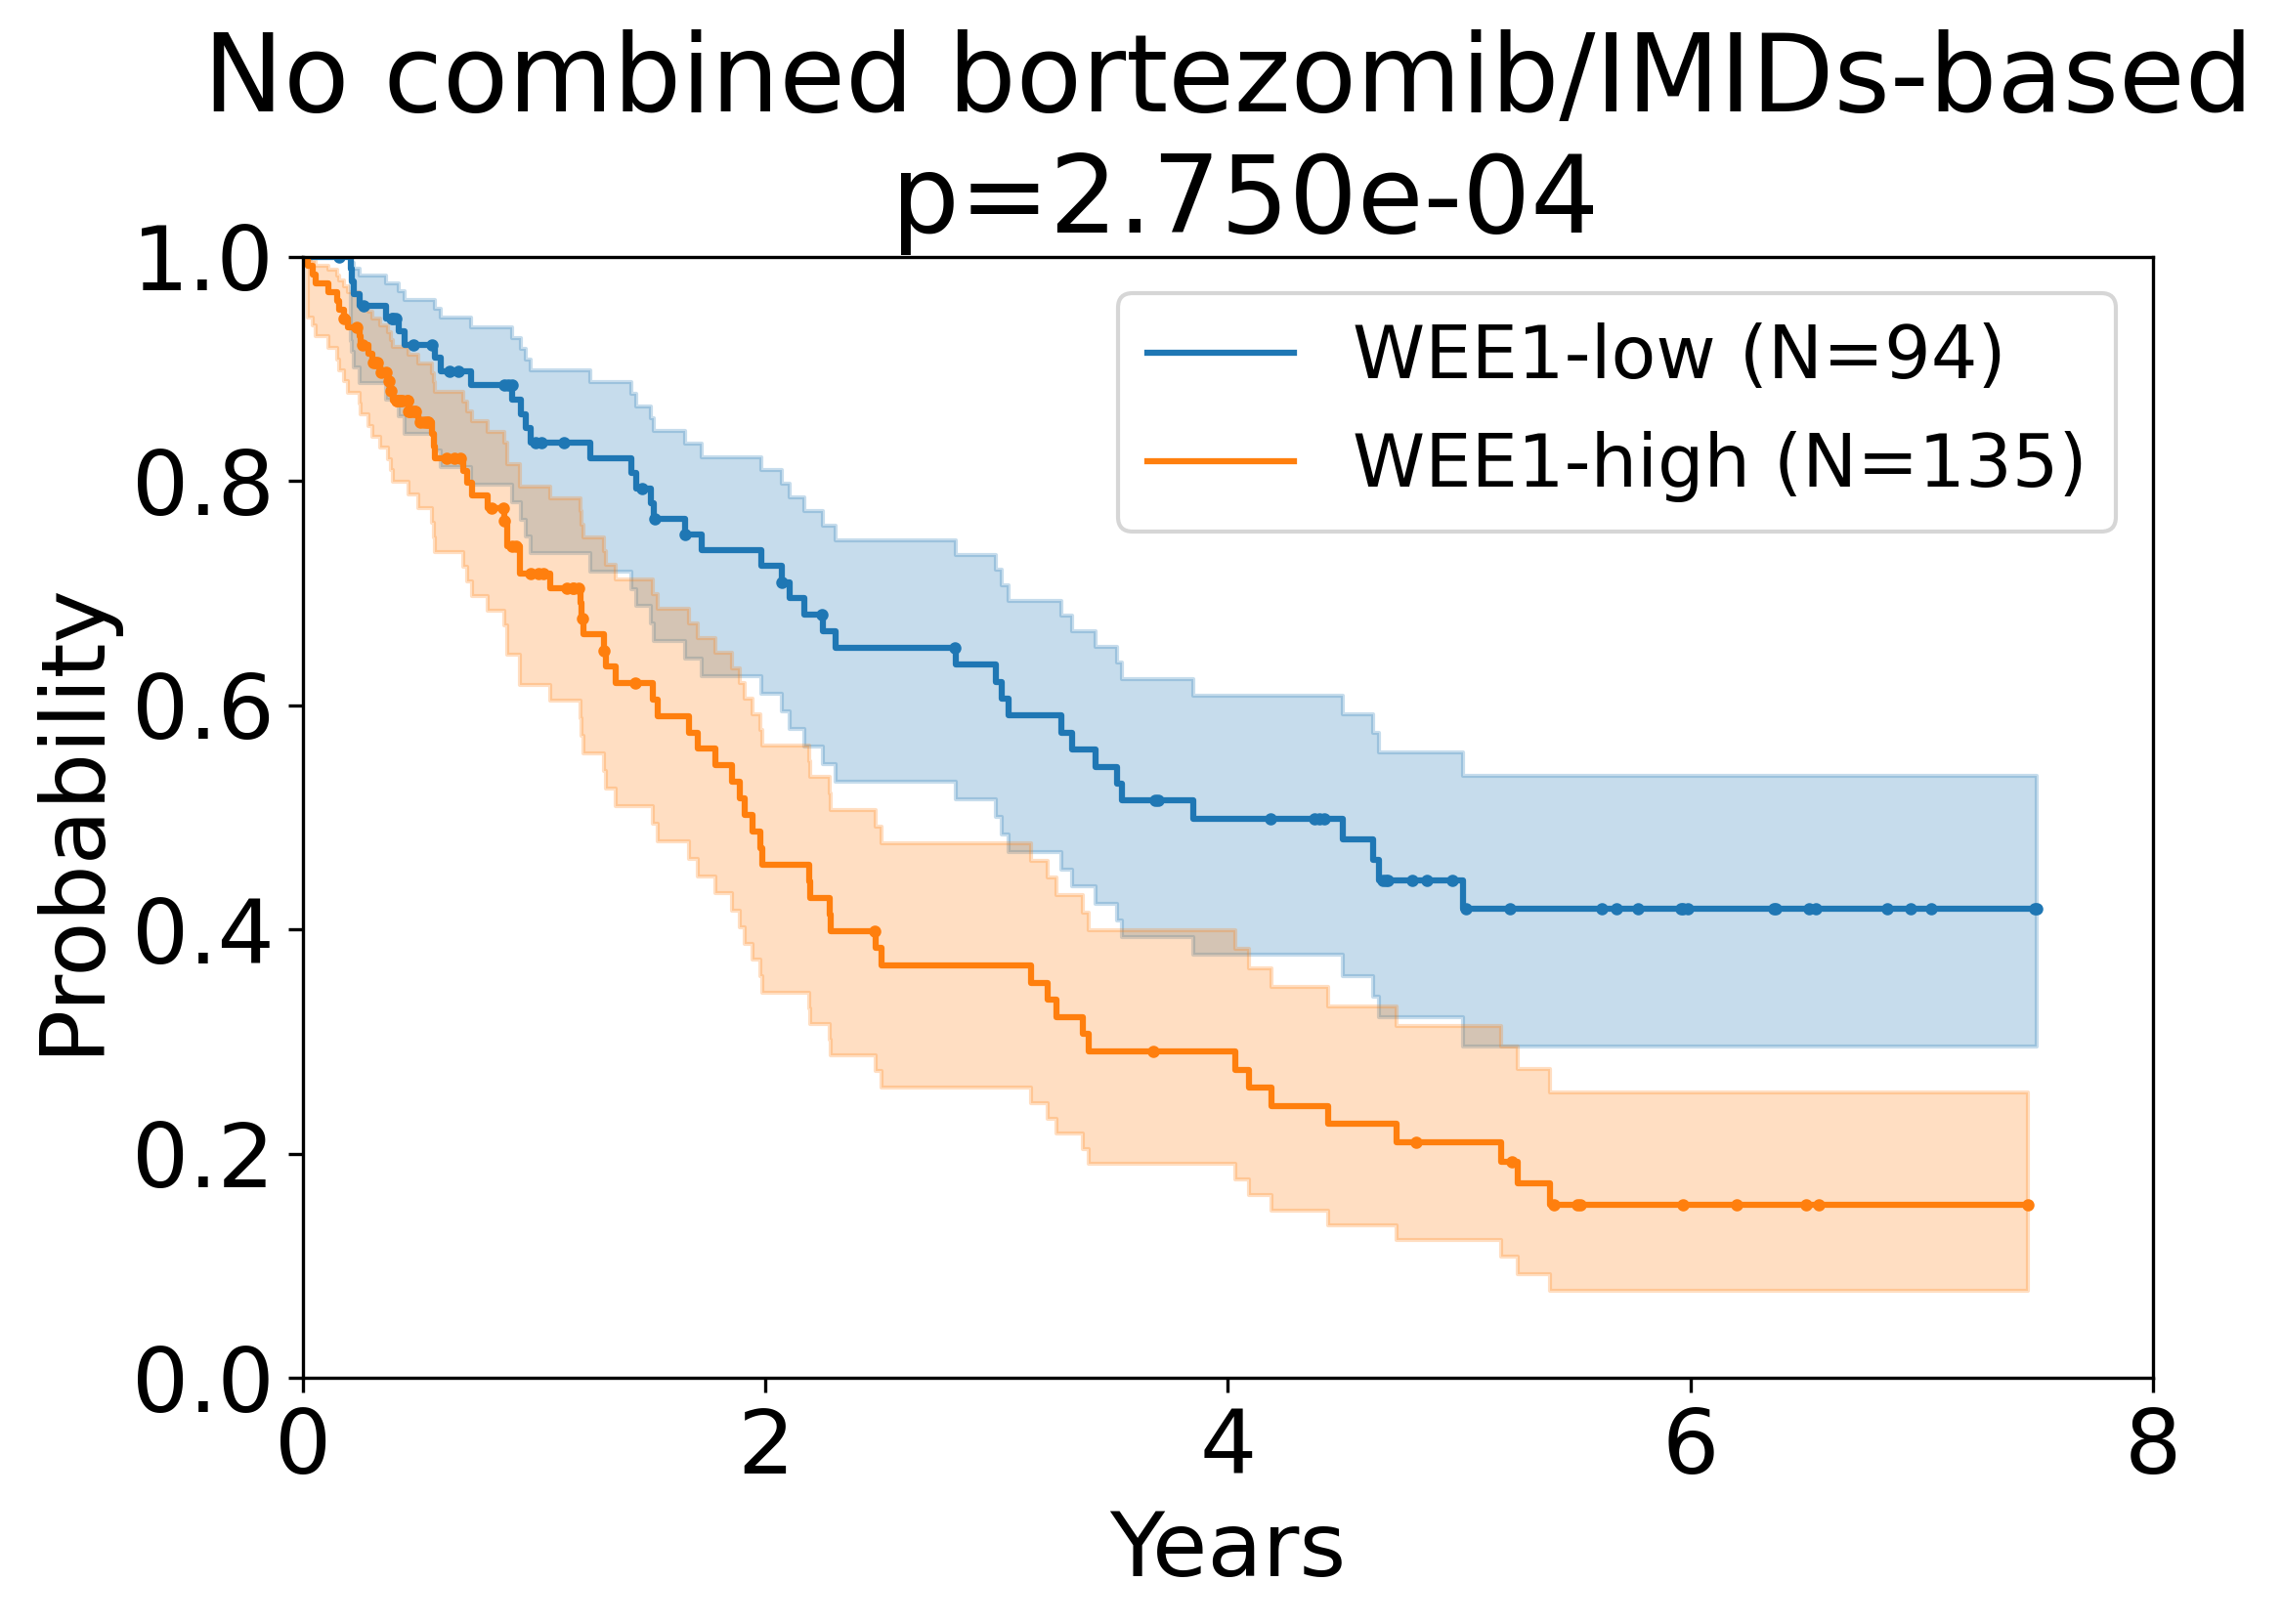

In [18]:
sct_mask = wee1_clin_data['D_PT_therclass'].values=="combined bortezomib/IMIDs-based"

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['low', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1-"+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("Combined bortezomib/IMIDs-based\n p=" + "{:.3e}".format(output.p_value))
# plt.title("SCT-True, KM PFS curves, p=" + str(output.p_value))
plt.xlabel('Years')
plt.ylabel('Probability')
plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()

# plt.savefig('Combined bortezomib_IMIDs-based.png')
sct_true_pval = output.p_value

# plot inverse

sct_mask = ~sct_mask

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['low', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1-"+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("No combined bortezomib/IMIDs-based\n p=" + "{:.3e}".format(output.p_value))

plt.xlabel('Years')
plt.ylabel('Probability')
plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()

# plt.savefig('No Combined bortezomib_IMIDs-based.png')
sct_true_pval = output.p_value



83
1 2.824657534246575  years
2 1.2136986301369863  years
359
1 4.706849315068493  years
2 2.3315068493150686  years


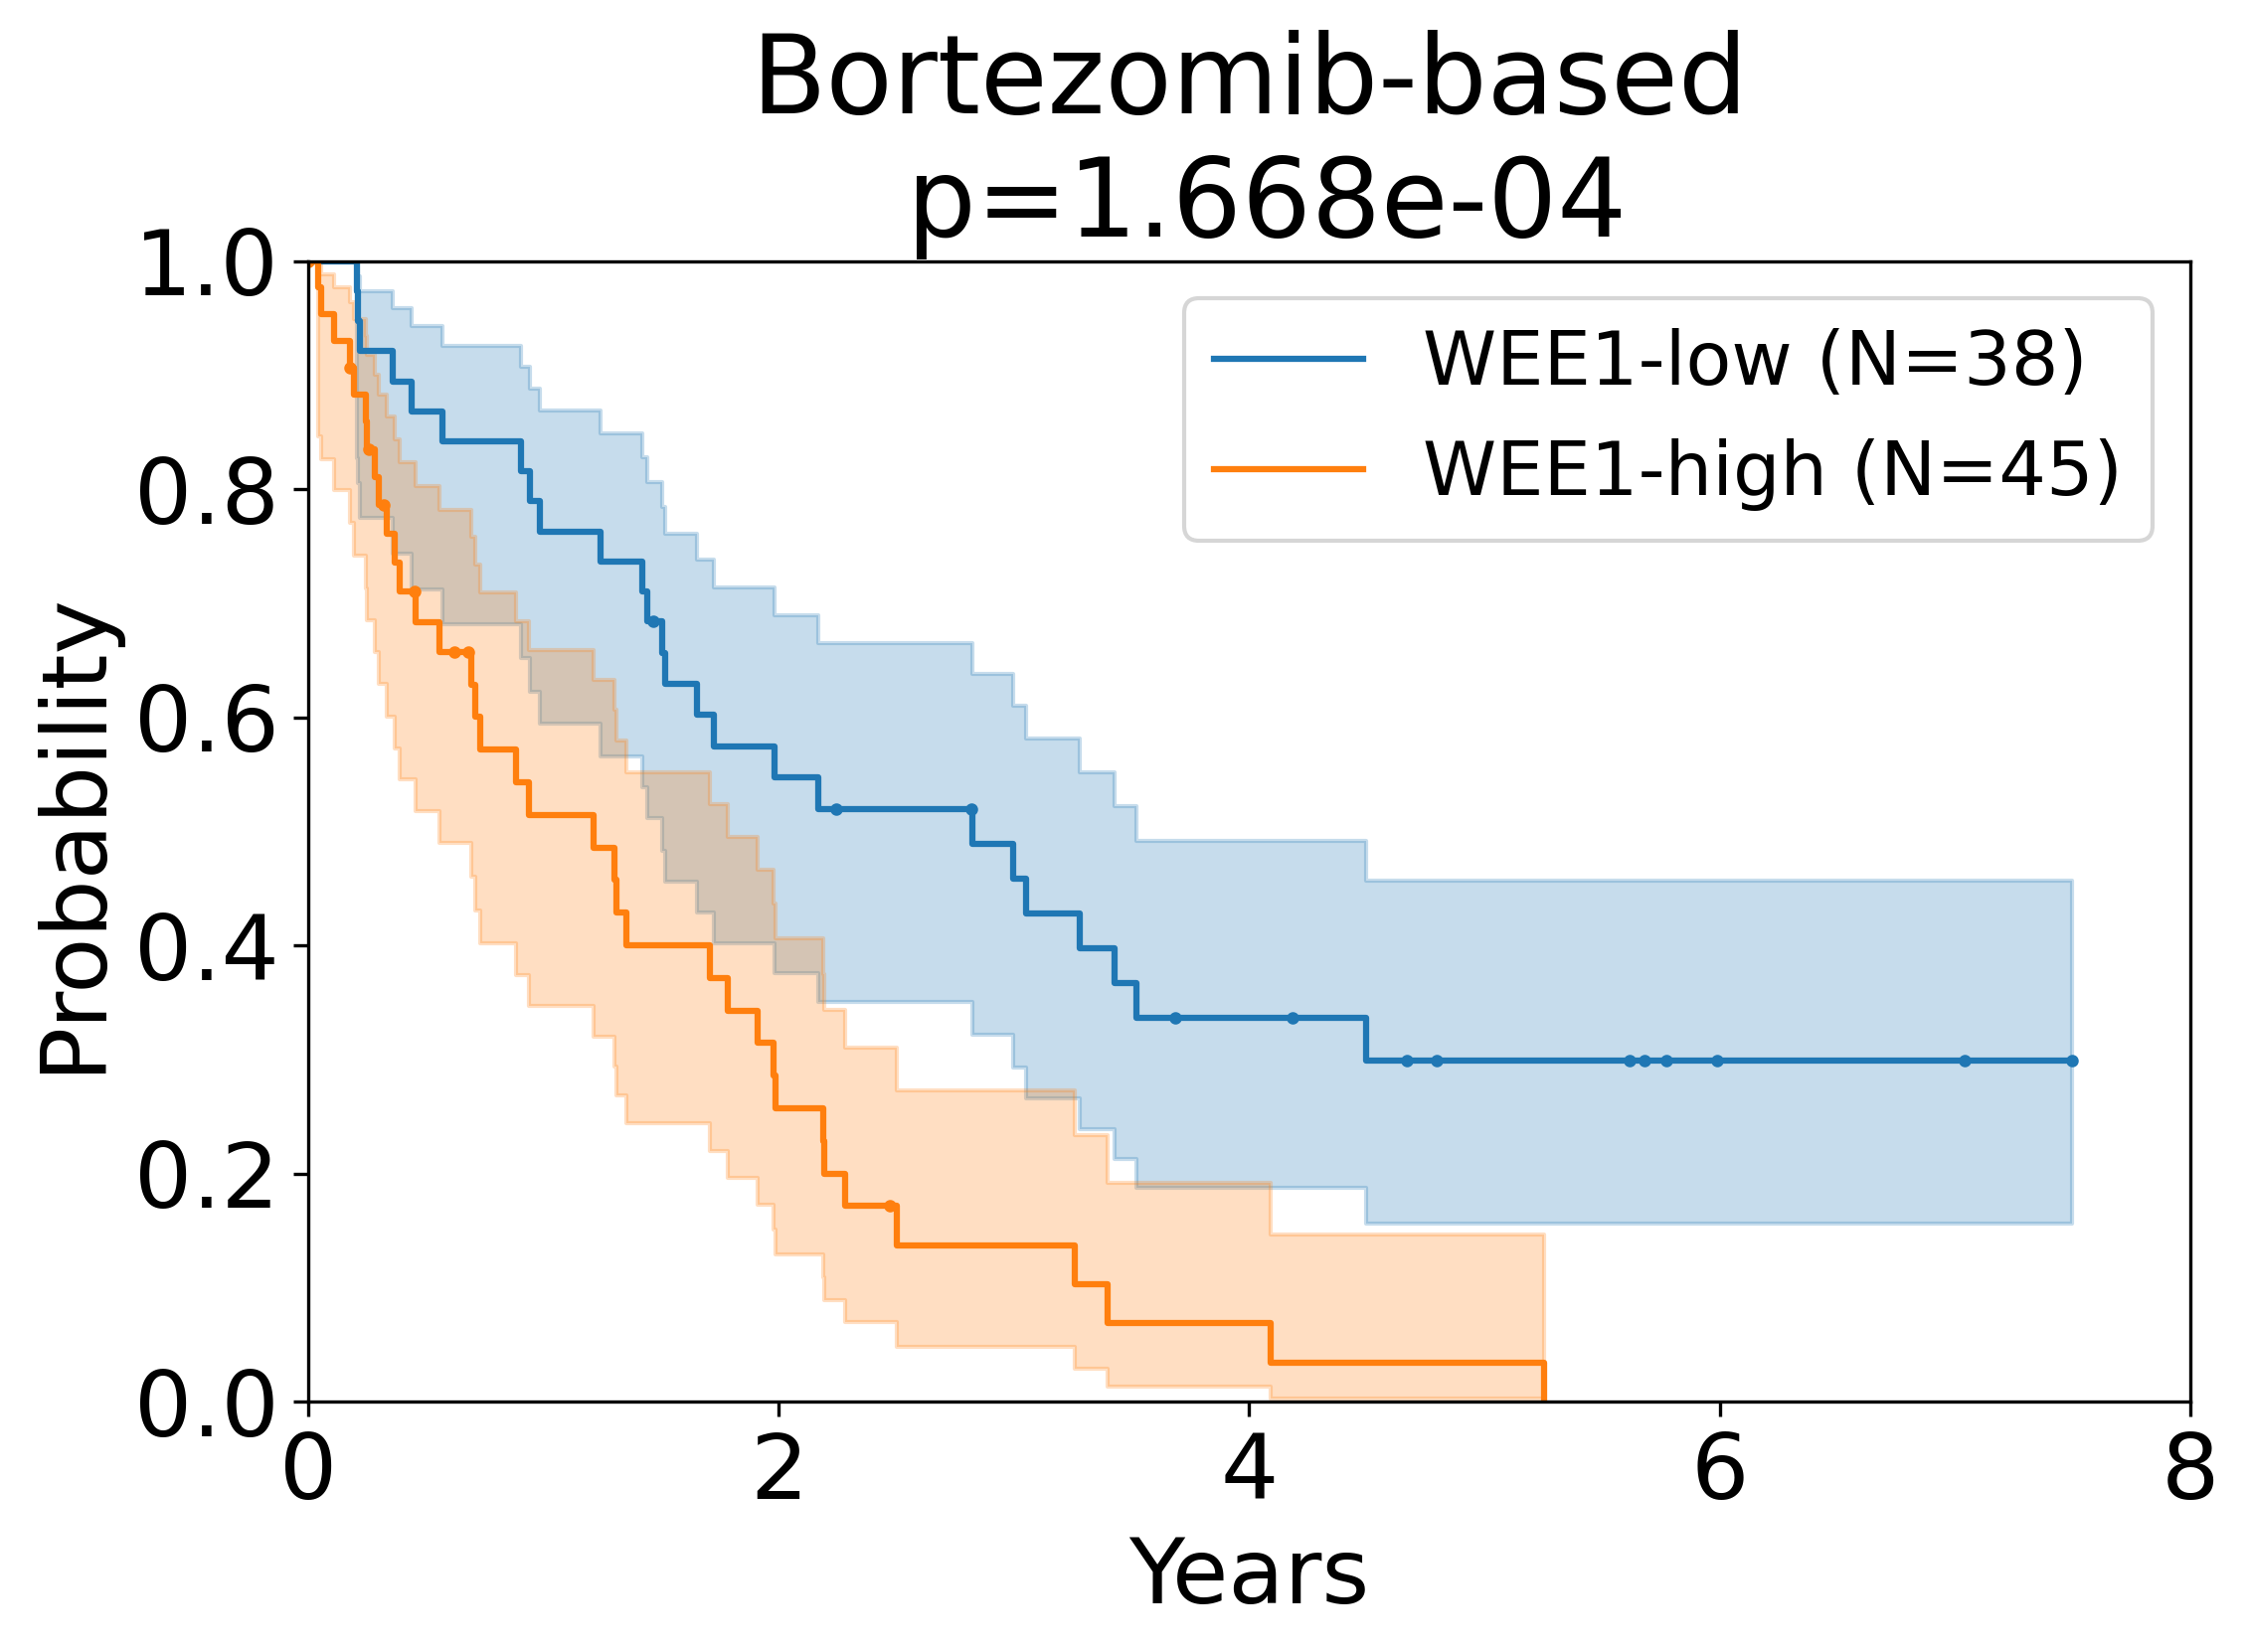

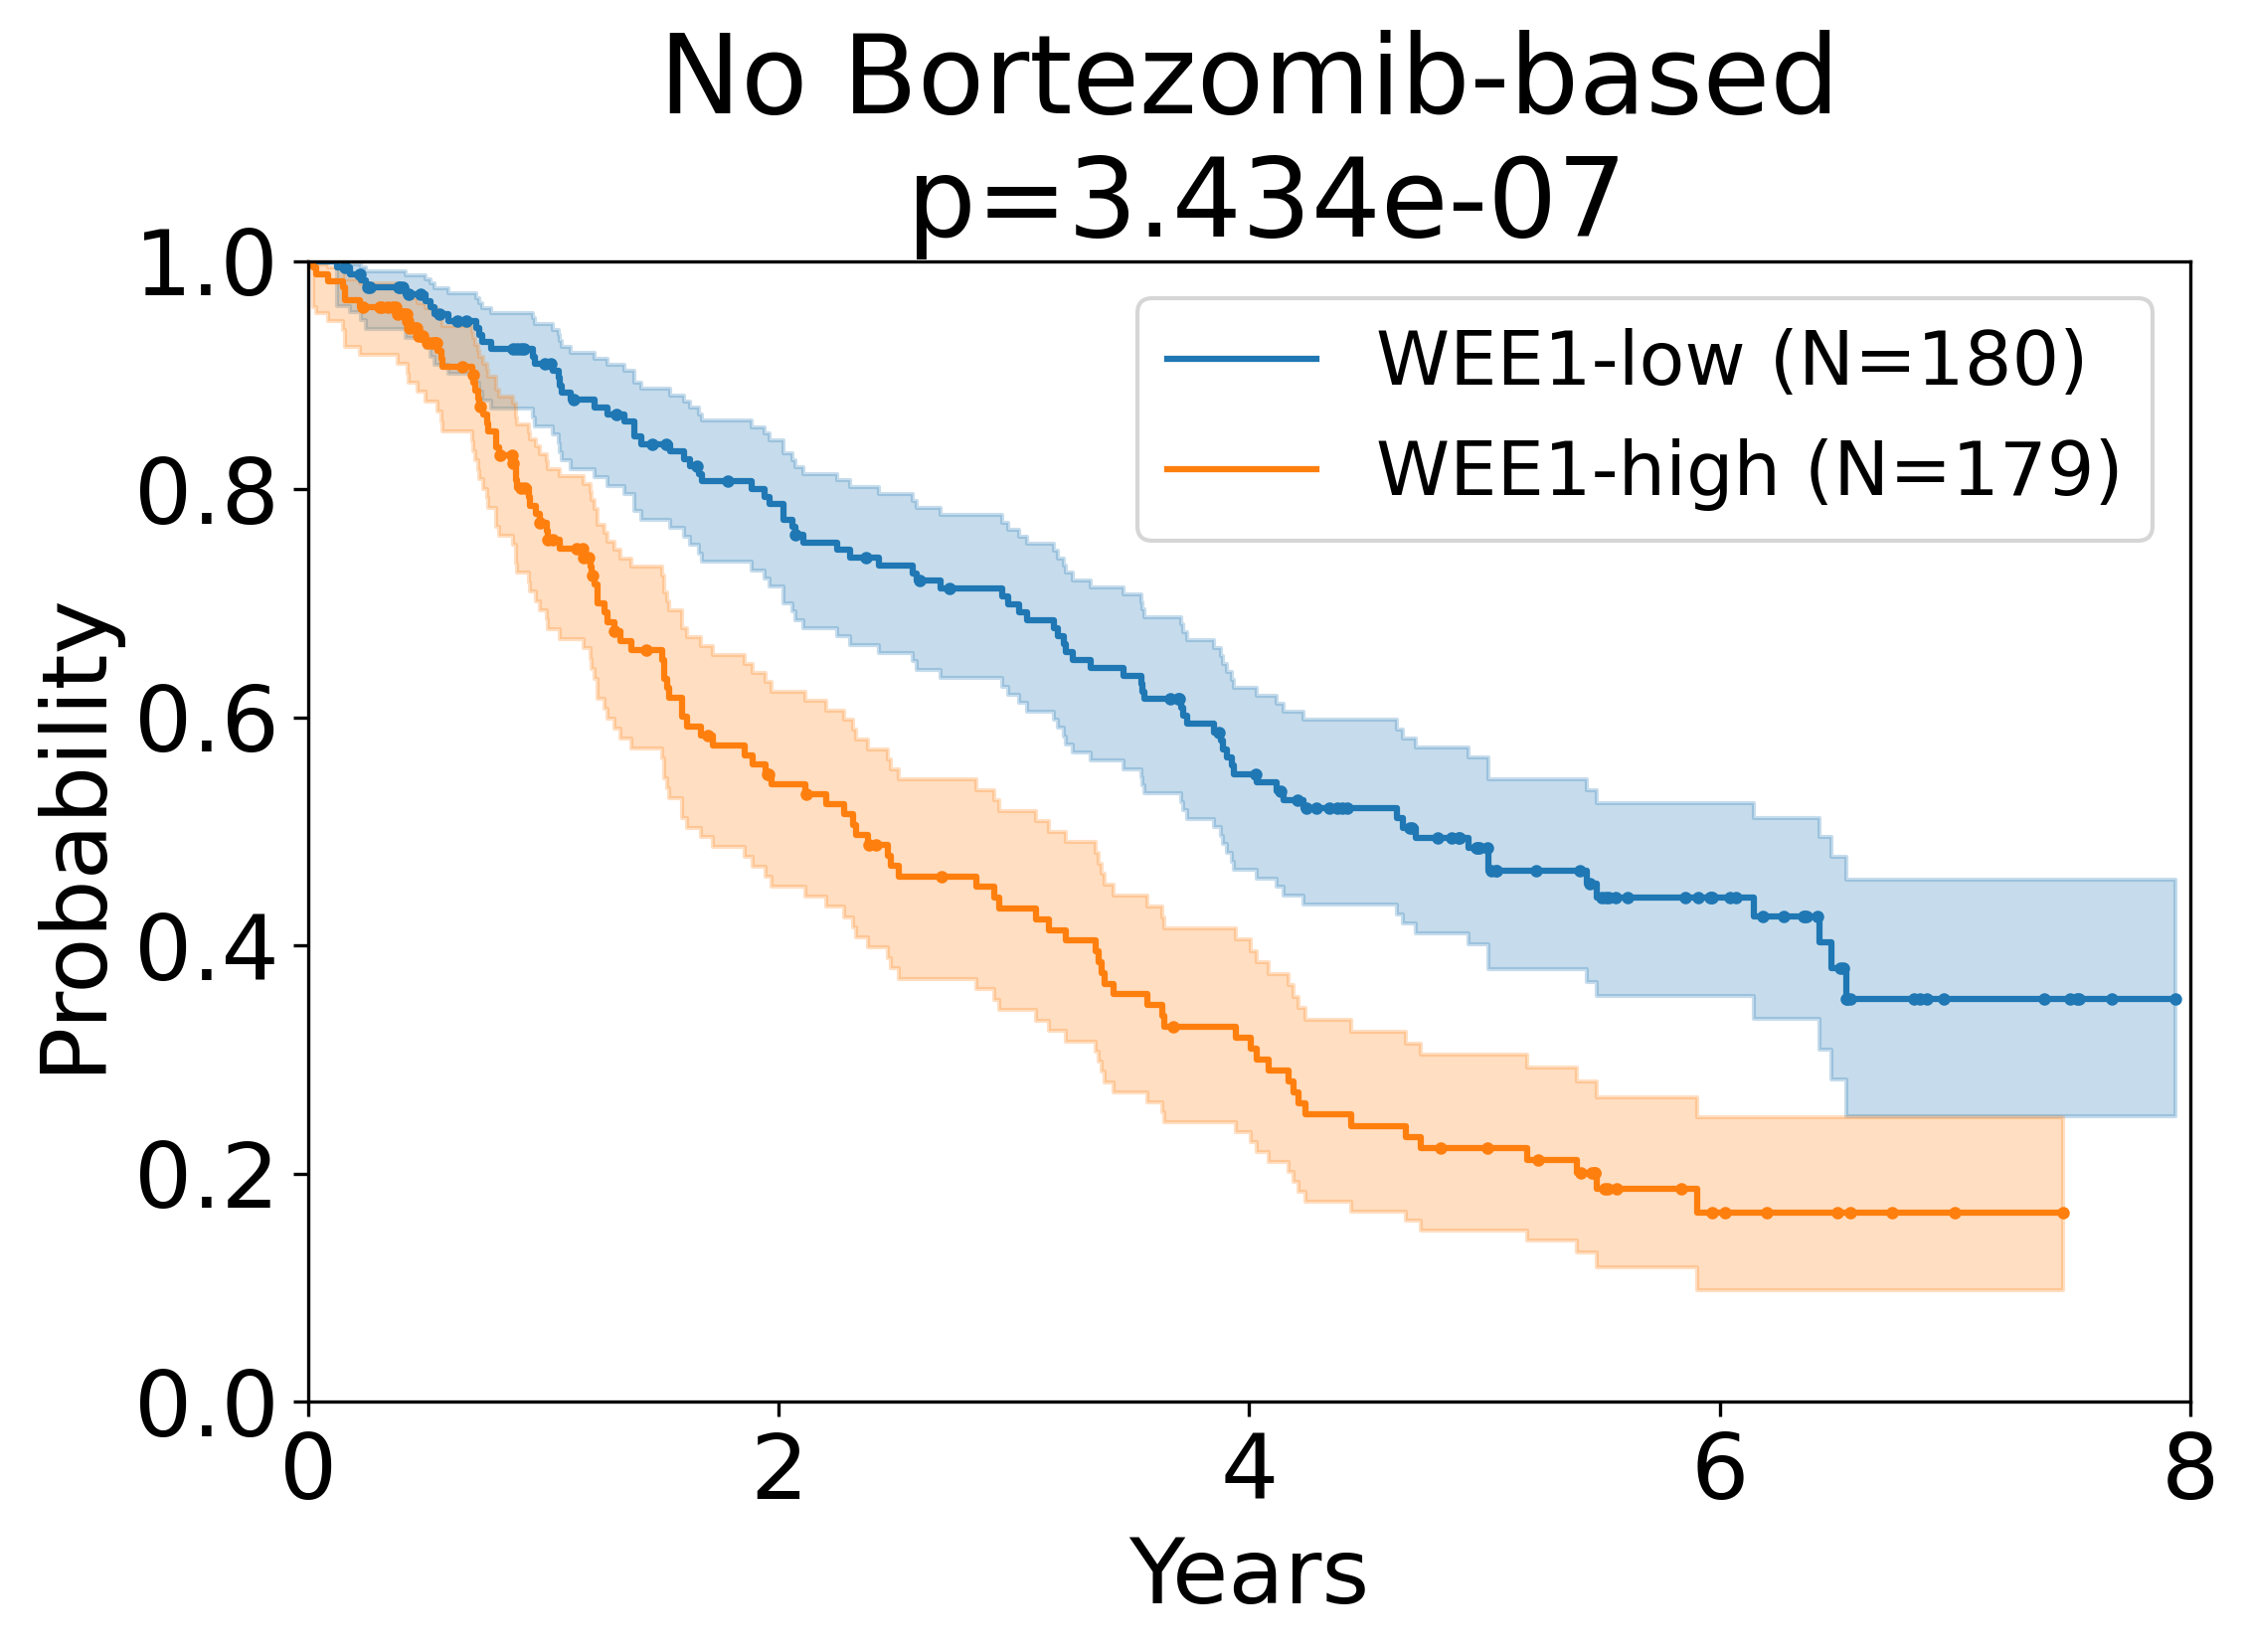

In [19]:
sct_mask = wee1_clin_data['D_PT_therclass'].values=="Bortezomib-based"

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['low', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1-"+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("Bortezomib-based\n p=" + "{:.3e}".format(output.p_value))
# plt.title("SCT-True, KM PFS curves, p=" + str(output.p_value))
plt.xlabel('Years')
plt.ylabel('Probability')

plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()

# plt.savefig('Bortezomib-based.png')

sct_true_pval = output.p_value

# plot inverse

sct_mask = ~sct_mask

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['low', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1-"+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("No Bortezomib-based\n p=" + "{:.3e}".format(output.p_value))

plt.xlabel('Years')
plt.ylabel('Probability')

plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()

# plt.savefig('No Bortezomib-based.png')
sct_true_pval = output.p_value



71
1 inf  years
2 3.147945205479452  years
371
1 3.9068493150684933  years
2 1.7863013698630137  years


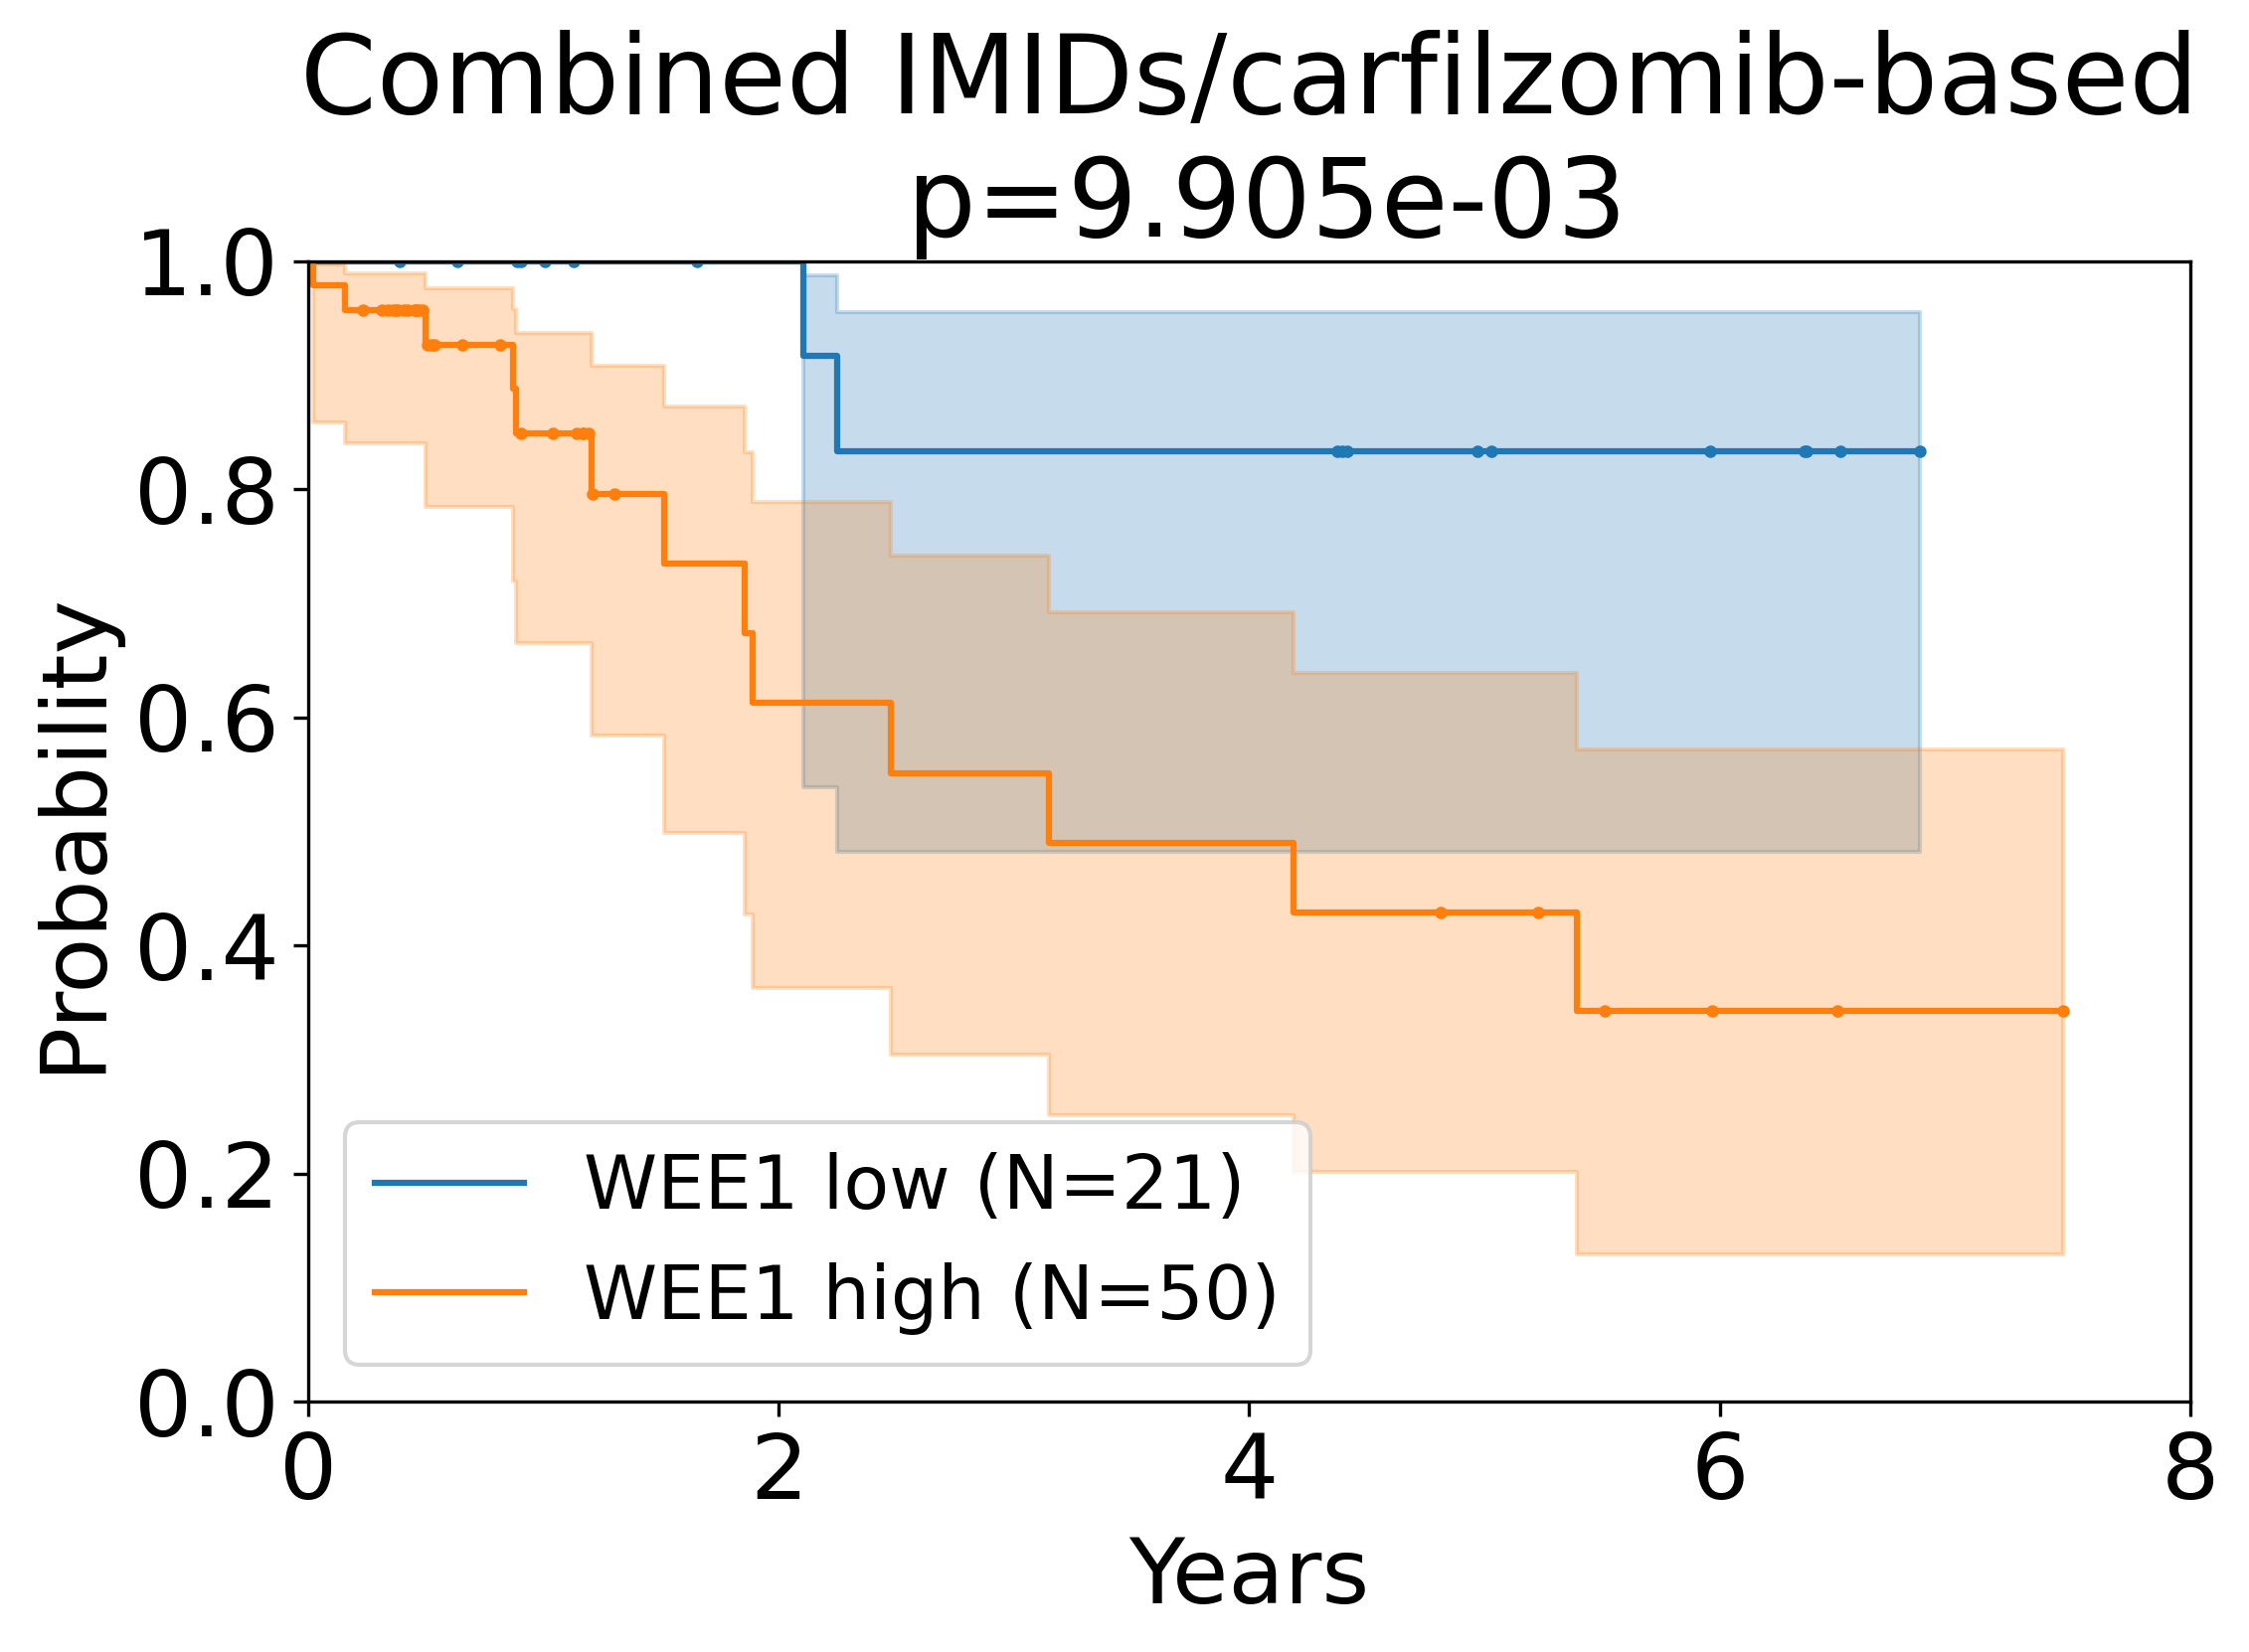

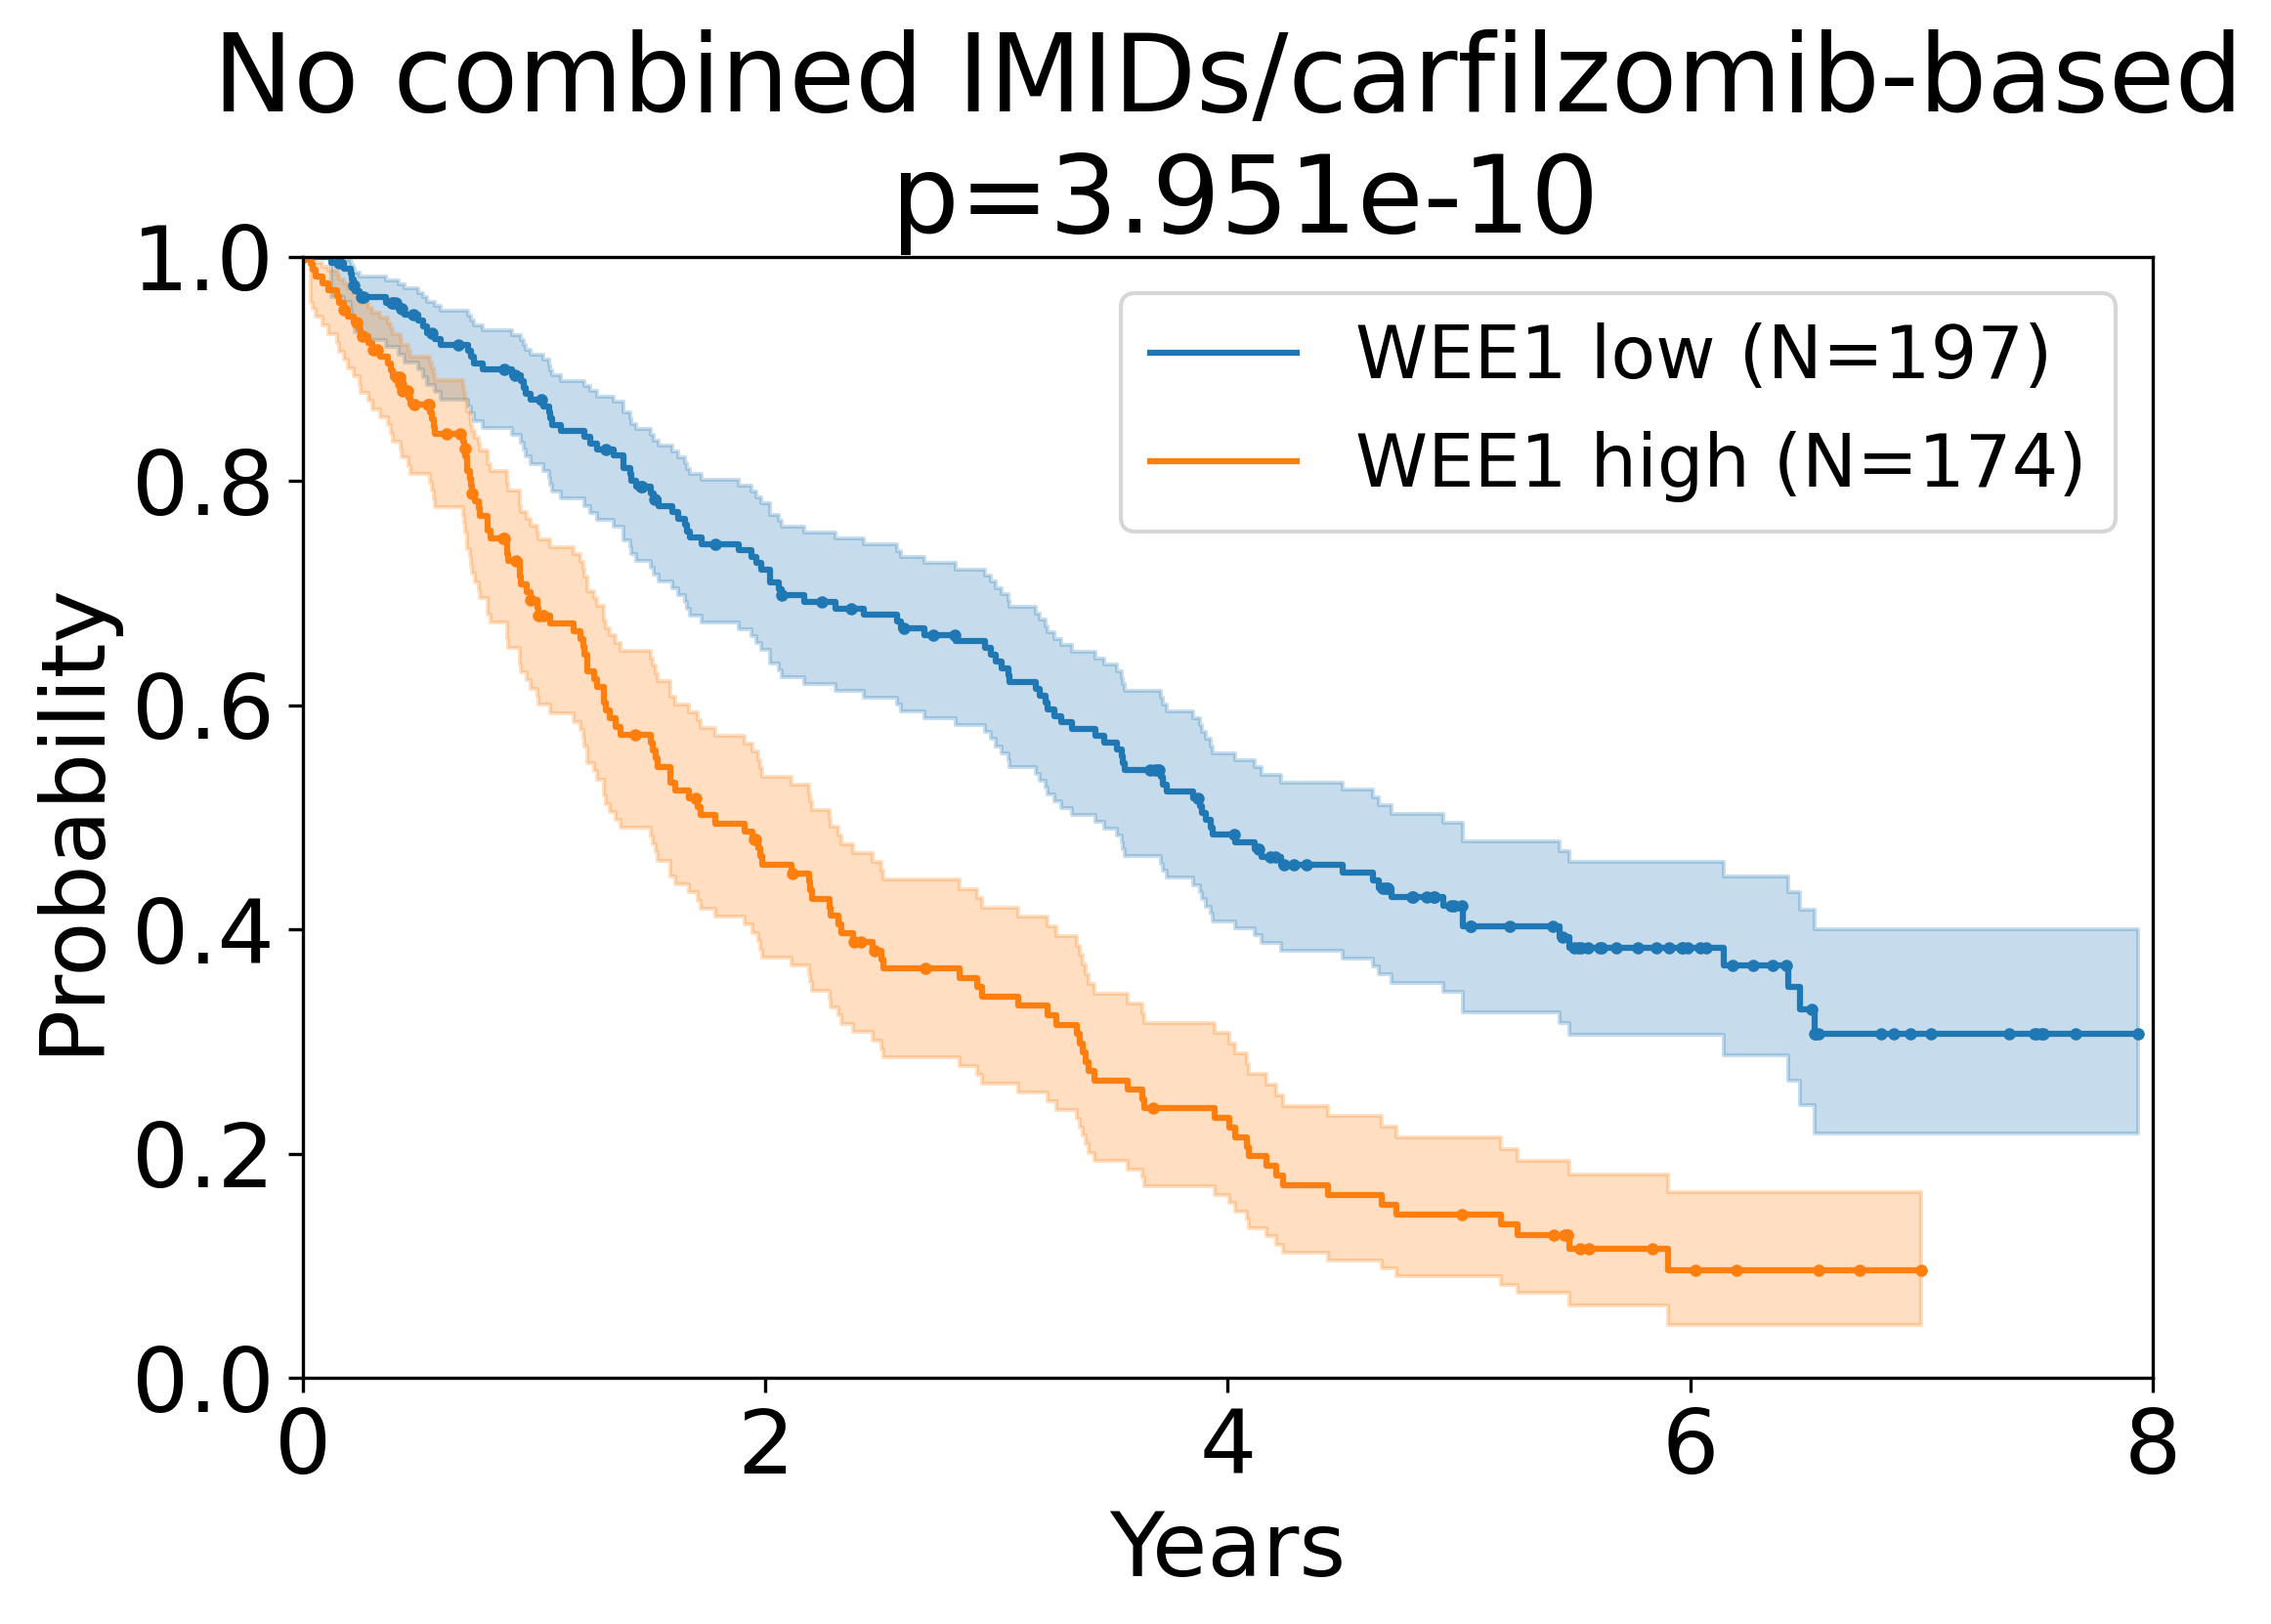

In [20]:
sct_mask = wee1_clin_data['D_PT_therclass'].values=="combined IMIDs/carfilzomib-based"

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['low', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1 "+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("Combined IMIDs/carfilzomib-based\n p=" + "{:.3e}".format(output.p_value))

plt.xlabel('Years')
plt.ylabel('Probability')

plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='lower left', fontsize="18")
plt.tight_layout()

# plt.savefig('Combined IMIDs carfilzomib-based.png')


sct_true_pval = output.p_value

# plot inverse

sct_mask = ~sct_mask

masked_event_duration = event_duration[sct_mask]
masked_censorlist = censorlist[sct_mask]
masked_wee1_mask = wee1_labels[sct_mask]

print(len(masked_wee1_mask) )

plt.figure(dpi=300, figsize=(8, 6))
ax = plt.subplot(111)

output = multivariate_logrank_test(masked_event_duration, masked_wee1_mask, masked_censorlist)
label_list = ['low', 'low', 'high']

kmf = KaplanMeierFitter()
for ncluster in [1, 2]: 
    kmf.fit(masked_event_duration[masked_wee1_mask==ncluster],\
            masked_censorlist[masked_wee1_mask==ncluster],\
            label="WEE1 "+label_list[ncluster]+\
            " (N="+ str(sum(masked_wee1_mask==ncluster)) +")")
    
    kmf.plot_survival_function(ax=ax,  show_censors=True,\
                               censor_styles={'ms': 2, 'marker': 'o'}, ci_show=True)
    print(ncluster, kmf.median_survival_time_, ' years')
plt.title("No combined IMIDs/carfilzomib-based\n p=" + "{:.3e}".format(output.p_value))

plt.xlabel('Years')
plt.ylabel('Probability')

plt.xlim(0, 8)
plt.ylim(0, 1) 
plt.rcParams.update({'font.size': 22})
plt.legend(loc='upper right', fontsize="18")
plt.tight_layout()

# plt.savefig('No Combined IMIDs carfilzomib-based.png')
sct_true_pval = output.p_value

